In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # graphics
import seaborn as sns #statistical data visualisation
import sklearn as sk

df = pd.read_csv("C:/Users/Maldu/dsprojects/Spam-Detector-NLP-project/emails_V2.csv")

In [32]:
df.shape 

(5726, 2)

In [33]:
df.tail(1) 

,text,spam
5725,NaN,NaN


In [34]:
df = df.dropna() 
df.shape 

(2043, 2)

In [35]:
df.dtypes

text     object
spam    float64
dtype: object

In [36]:
df['spam'].unique() 

array([1., 0.])

In [37]:
df['spam'].value_counts()  

1.0    1368
0.0     675
Name: spam, dtype: int64

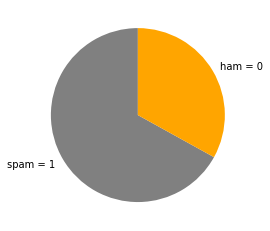

In [27]:
mylabels = ['spam = 1', 'ham = 0']
mycolors = ['grey', 'orange']

plt.pie(perc_df, labels = mylabels,colors = mycolors,  startangle = 90)
plt.show() 


In [11]:
perc_df = df['spam'].value_counts(normalize=True)*100
print(perc_df)

1.0    66.960352
0.0    33.039648
Name: spam, dtype: float64


# Data Cleaning

In [38]:
import re
import string

#### Remove punctuation

In [39]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
df['text']=df['text'].apply(str)

def clean_text(text):
    #will replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)  
    #To remove the punctuations
    text = text.translate(str.maketrans(' ',' ',string.punctuation))
    #will consider only alphabets and numerics
    text = re.sub('[^a-zA-Z]',' ',text)  
    #will replace newline with space
    text = re.sub("\n"," ",text)
    #will convert to lower case
    text = text.lower()
    # will split and join the words
    text=' '.join(text.split())
    #remove space
    text = re.sub(r"\s+"," ",text).strip()
    return text


df['text']=df['text'].apply(clean_text)

In [41]:
df.iloc[1043,0]

'subject harderr hello welcome to medzon vivacity line shop we are pleased to introduce ourselves as one of the ieading online phar purree maceuticai shops purgatory v reinforcement r a fellow l l nitrous l la settee g a cuisine cl isv batter a validate um andmanyother save ov steppe er total c pigsty onfidentiaiity worldwide recension shlpplng over paradigm miilion customers in countries have a anemoscope nice day'

#### Tokenization

In [42]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


df['text'] = df['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maldu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Stopwords

In [43]:
from nltk.corpus import stopwords


df['text'] = [x for x in df['text'] if x not in stopwords.words('english')]

#### Stemming

In [44]:
import nltk
from nltk.stem.porter import *

porterStemmer = PorterStemmer()


def stem_sentences(text):
    stemmed_tokens = [porterStemmer.stem(w) for w in text]
    return ' '.join(stemmed_tokens)

df['text'] = df['text'].apply(stem_sentences)

#### Lemmatizing

In [45]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

lemmmatizer=WordNetLemmatizer()
 
def lem_sentences(text):
    words=word_tokenize(text)
    lemmed_words = [WordNetLemmatizer().lemmatize(w) for w in text]
    return ''.join(lemmed_words)

df['text'] = df['text'].apply(lem_sentences)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maldu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Vectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(df['text'])

print(vectorizer.get_feature_names())


['aa', 'aal', 'aaliyah', 'aall', 'aaron', 'aawesom', 'ab', 'aba', 'abacha', 'abacu', 'abaixo', 'abandon', 'abargain', 'abattoir', 'abba', 'abbestellen', 'abbrevi', 'abcsearch', 'abdalla', 'abdallat', 'abdulla', 'abdullah', 'abei', 'abel', 'aber', 'abf', 'abi', 'abidjan', 'abiiiti', 'abil', 'abilen', 'abit', 'abitibi', 'abl', 'abler', 'abli', 'abn', 'abneg', 'abnorm', 'aboard', 'abondantli', 'abook', 'abort', 'about', 'aboutthi', 'aboutu', 'aboutvenita', 'abov', 'aboveground', 'abovetelefax', 'abqewvbgf', 'abraham', 'abram', 'abramov', 'abreast', 'abreo', 'abroad', 'abscissa', 'abscond', 'absenc', 'absolut', 'absolv', 'absorb', 'abspielt', 'abstract', 'absult', 'absurd', 'abu', 'abuja', 'abund', 'abundancegroup', 'abus', 'abyssinia', 'ac', 'academ', 'academia', 'acadia', 'acc', 'acceler', 'accent', 'accept', 'acces', 'acceso', 'access', 'accessori', 'accid', 'accliv', 'accommod', 'accomod', 'accompani', 'accompanist', 'accomplish', 'accord', 'accordingli', 'account', 'accountif', 'accre

C:\Users\Maldu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
vectors.toarray()



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
vectors.shape

(2043, 17187)

In [54]:
##TRAINING AND TEST DATASET PREPARATION


In [56]:
X = vectors
Y = df['spam']

In [57]:
X.shape

(2043, 17187)

In [58]:
Y.shape

(2043,)

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [61]:
X_train

<1634x17187 sparse matrix of type '<class 'numpy.int64'>'
	with 172122 stored elements in Compressed Sparse Row format>

In [62]:
#### Logistic Regression



In [63]:


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)



LogisticRegression(random_state=0)

In [67]:
Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)
print(cm)

accuracy_score(Y_test,Y_Pred)

[[126   9]
 [  1 273]]


0.9755501222493888

In [68]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_Pred))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       135
         1.0       0.97      1.00      0.98       274

    accuracy                           0.98       409
   macro avg       0.98      0.96      0.97       409
weighted avg       0.98      0.98      0.98       409



In [69]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_Pred)

0.9648418491484185

In [70]:
#### Decision Tree

In [71]:


from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)



0.9486552567237164

In [72]:
#### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0,)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

0.9682151589242054

In [74]:
#### Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

0.980440097799511

In [76]:
#### SVM

NameError: name 'SVM' is not defined

In [77]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state=0)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

0.9755501222493888

In [78]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

0.9095354523227384

In [79]:
#### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p = 2)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

0.902200488997555